In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime
%matplotlib inline
plt.rcParams['font.family'] = ['SimHei'] #  set font for chinese in matplotlib figure

In [2]:
df_policy_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/policy_0702.csv')
df_claim_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/claim_0702.csv')
df_training_raw = pd.read_csv('../Tbrain_Insurance/training-set.csv')
df_testing_raw = pd.read_csv('../Tbrain_Insurance/testing-set.csv')
df_policy = df_policy_raw 
df_claim = df_claim_raw 
df_training = df_training_raw
df_testing = df_testing_raw
pd.set_option('display.max_columns', None)

# Policy File
shape  (1747942, 41)

In [95]:
df_policy.shape

(1747942, 41)

In [ ]:
# Policy_Number	保單號碼 
# Insured's_ID	被保險人代號(替代值) 
# Prior_Policy_Number	前保單號     almost == Cancellation =='Y'
# Cancellation	非繼承自前保單        almost match "Prior_policy Number, only #12 w/o cancellation
# Vehicle_identifier	車牌號碼 
# Vehicle_Make_and_Model1	廠牌名稱一 
# Vehicle_Make_and_Model2	廠牌名稱二
# Manafactured_Year_and_Month	製造年份 
# Engine_Displacement_(Cubic_Centimeter)	排氣量 
# Imported_or_Domestic_Car	車系代號
# Coding_of_Vehicle_Branding_&_Type	廠牌車型代號
# qpt	乘載數量 
# fpt	乘載單位 
# Main_Insurance_Coverage_Group	險種分類 
# Insurance_Coverage	險種代碼
# Insured_Amount1	保額一 
# Insured_Amount2	保額二 
# Insured_Amount3	保額三
# Coverage_Deductible_if_applied	自負額 
# Premium	簽單保費 
# Replacement_cost_of_insured_vehicle	重置成本
# Distribution_Channel	主通路代號 
# Multiple_Products_with_TmNewa_(Yes_or_No?)	同一車主前一年度非車險保單件數
# lia_class	車責本期級數 
# plia_acc	車責賠款係數 
# pdmg_acc	車體賠款係數 
# fassured	被保險人性質
# ibirth	出生日期 
# fsex	性別 
# fmarriage	婚姻狀況 
# aassured_zip	郵遞區號
# iply_area	承保地區代號(分公司) 
# dbirth	要保人出生日期 
# fequipment1	配備-音響註記 
# fequipment2	配備-車箱註記 
# fequipment3	配備-冷凍機組註記 
# fequipment4	配備-車框、車斗註記 
# fequipment5	配備-昇降系統註記 
# fequipment6	配備-電動車電池註記
# fequipment9	配備-其他 
# nequipment9	配備-其他說明

# Policy NAN column

In [93]:
# Prior_Policy_Number    328557
# Vehicle_identifier           513
# ibirth                              317765
# fsex                               41945
# fmarriage                      41945
# dbirth                            258932
nan_count = df_policy.isnull().sum()
nan_count[nan_count > 0]

Prior_Policy_Number    328557
Vehicle_identifier        513
ibirth                 317765
fsex                    41945
fmarriage               41945
dbirth                 258932
dtype: int64

# Policy_Number 保單號碼

In [ ]:
df_policy['Policy_Number'].nunique() # 351273 unique value

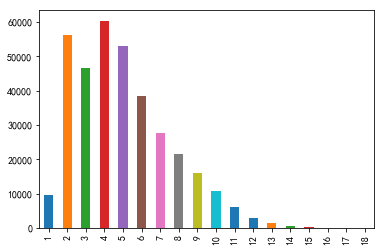

In [104]:
df_policy['Policy_Number'].value_counts().value_counts().sort_index().plot(kind='bar') # 保單號碼count 分佈

# Insured's_ID 被保險人代號(替代值)

In [136]:
insured_ID_count = df_policy['Insured\'s_ID'].value_counts() #.value_counts()
# insured_ID_count[insured_ID_count > 18].plot(kind='bar')
print(insured_ID_count.describe()) # Insured's_ID
insured_ID_count.head(10)

count    299999.000000
mean          5.826493
std           9.027411
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max        2225.000000
Name: Insured's_ID, dtype: float64


2bf9fa1fb1d47da69c13a3eac812ac04201003764    2225
2797e5bb6a5ac65aded08fe33c73f3e53645ea5ae    1433
243b86634a662c4a926bb8e8fec07e47a0ba74720    1289
2195ecfc72d2b85f9865f8cbf6f313ce2d23aff98    1228
2705f5fdc2ba60cbb866e7ae9f08779016d87cadf    1073
2f7d55c00ae9dab8adee1e9c8969116174ca5ac27     577
25df84bd92c3de04c609f47a29225c1af0bd566ab     574
2774d6521622242526641c58ef5d6a0bf86248055     563
15e6271694b719a536e6dabd5d85e0320ff895d73     542
201ead89c8239cceb35d964e6f3acdfe35d384c72     499
Name: Insured's_ID, dtype: int64

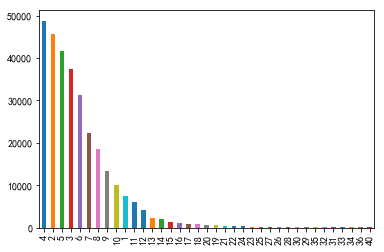

In [131]:
insured_ID_count.value_counts()[insured_ID_count.value_counts() > 50].plot(kind='bar') # insured_ID_count 次數分佈

# Prior_Policy_Number 前保單號

In [140]:
# is null: not null =  328557 : 1419385
df_policy['Prior_Policy_Number'].isnull().value_counts()

False    1419385
True      328557
Name: Prior_Policy_Number, dtype: int64

In [144]:
df_policy['Prior_Policy_Number'].value_counts().describe()

count    281677.000000
mean          5.039052
std           2.537259
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          26.000000
Name: Prior_Policy_Number, dtype: float64

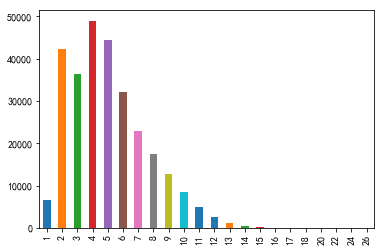

In [4]:
df_policy['Prior_Policy_Number'].value_counts().value_counts().sort_index().plot(kind='bar')

# Cancellation 非繼承自前保單
Ｙ：是 空白：否

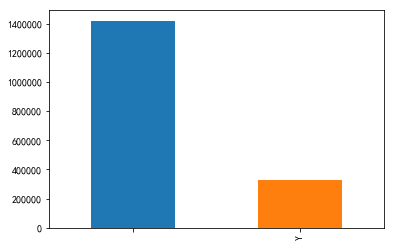

In [7]:
df_policy['Cancellation'].value_counts().plot(kind='bar')

# Vehicle_identifier 車牌號碼

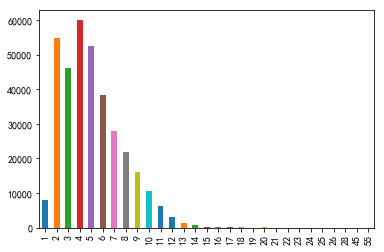

In [12]:
df_policy['Vehicle_identifier'].value_counts().value_counts().sort_index().plot(kind='bar') # Vehicle_identifier count distribution

# Vehicle_Make_and_Model1, Vehicle_Make_and_Model2 廠牌名稱

In [14]:
# df_policy['Vehicle_Make_and_Model1'].value_counts() # length: 136
# df_policy['Vehicle_Make_and_Model2'].value_counts() # length: 8112

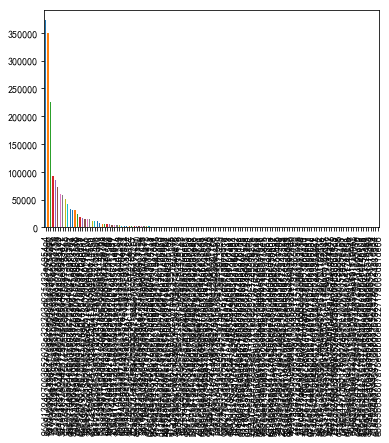

In [17]:
df_policy['Vehicle_Make_and_Model1'].value_counts().plot(kind='bar')

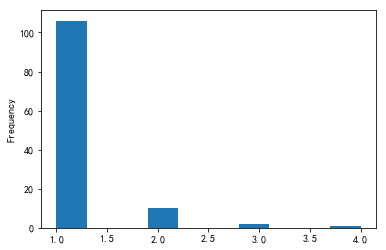

In [18]:
df_policy['Vehicle_Make_and_Model1'].value_counts().value_counts().sort_index().plot(kind='hist')

In [23]:
df_policy['Vehicle_Make_and_Model2'].value_counts().describe()
# .value_counts().sort_index().plot(kind='bar')

count     8112.000000
mean       215.476085
std        623.963452
min          1.000000
25%         11.000000
50%         37.000000
75%        143.000000
max      15686.000000
Name: Vehicle_Make_and_Model2, dtype: float64

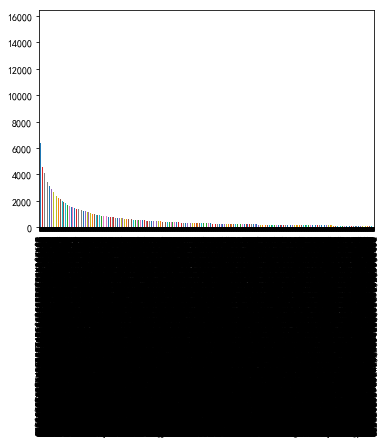

In [27]:
Vehicle_Make_and_Model2_count = df_policy['Vehicle_Make_and_Model2'].value_counts()
Vehicle_Make_and_Model2_count[Vehicle_Make_and_Model2_count > 100].plot(kind='bar')

# Manafactured_Year_and_Month 製造年份

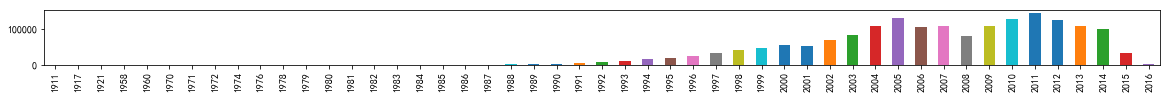

In [33]:
plt.figure(figsize=(20,1))
df_policy['Manafactured_Year_and_Month'].value_counts().sort_index().plot(kind='bar')

# Engine_Displacement_(Cubic_Centimeter) 排氣量

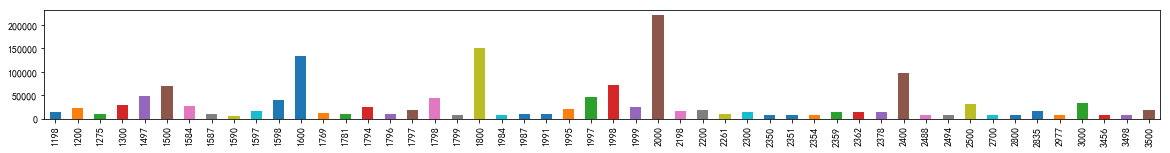

In [53]:
# 前50大排氣量
plt.figure(figsize=(20,2))
df_policy['Engine_Displacement_(Cubic_Centimeter)'].value_counts().head(50).sort_index().plot(kind='bar')

## Imported_or_Domestic_Car : 車系代號

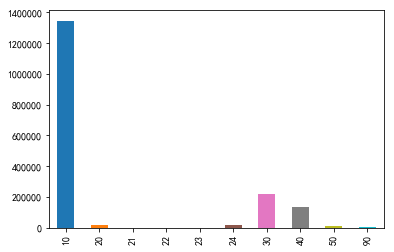

In [27]:
# 10	國產車 77%
# 20	美國車  1%
# 21	福特
# 22	通用
# 23	克萊斯勒
# 24	美規日車 1%
# 30	歐洲車 12.5%
# 40	日本車 7.7%
# 50	韓國車
# 90	其它

# counts
# df_car.groupby('Imported_or_Domestic_Car').count()
# 10    1346381
# 20      15375
# 21        858
# 22        207
# 23         29
# 24      14459
# 30     218102
# 40     134929
# 50      12249
# 90       5353

# car_types = sorted(df_policy['Imported_or_Domestic_Car'].unique()) # [10, 20, 21, 22, 23, 24, 30, 40, 50, 90]

# for b in sorted(set(df_policy['Imported_or_Domestic_Car'])):
#     print(b, "  ", df_policy[df_policy['Imported_or_Domestic_Car'] == b].shape[0] / df_policy.shape[0] * 100, "%")
# plt.bar(car_types, df_car['Imported_or_Domestic_Car'].value_counts().sort_index().values)
df_policy['Imported_or_Domestic_Car'].value_counts().sort_index().plot(kind='bar')

<Container object of 6 artists>

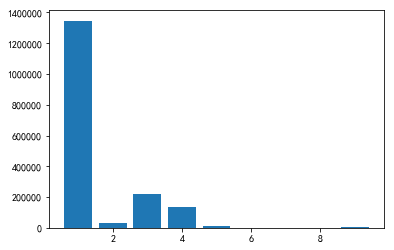

In [26]:
#  Imported_or_Domestic_Car 十位數
df_car = df_policy[['Imported_or_Domestic_Car']].copy()
df_car['car_types'] = (df_car['Imported_or_Domestic_Car'] /10).apply(np.floor)
df_car['car_types'].value_counts().sort_index().values
plt.bar(sorted(df_car['car_types'].unique()), df_car['car_types'].value_counts().sort_index())

# Coding_of_Vehicle_Branding_&_Type 廠牌車型代號

count     7405.000000
mean       236.048886
std        666.120506
min          1.000000
25%         10.000000
50%         37.000000
75%        158.000000
max      15686.000000
Name: Coding_of_Vehicle_Branding_&_Type, dtype: float64


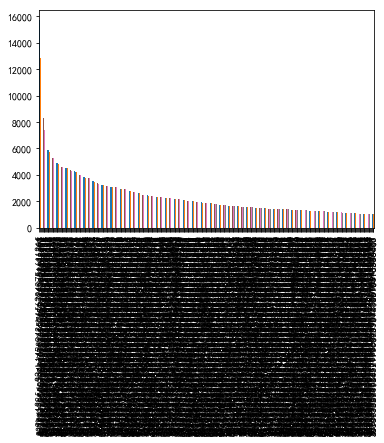

In [25]:
# count: 7405
car_types = df_policy['Coding_of_Vehicle_Branding_&_Type'].value_counts()
print(car_types.describe())
car_types[car_types > 1000].plot(kind='bar') # count: 409 car types

In [ ]:
# qpt 乘載數量

2.0       75671
3.0       88836
4.0       20649
5.0     1393667
6.0       14388
7.0      119541
8.0       29702
9.0        3376
11.0          6
12.0          2
13.0          6
17.0         18
18.0          6
19.0       1868
20.0        170
21.0          4
22.0          3
23.0          2
24.0         27
Name: qpt, dtype: int64


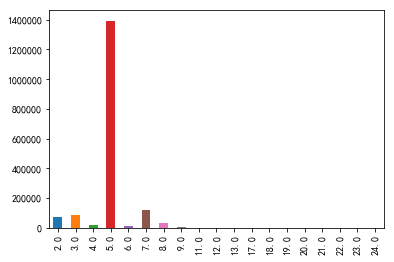

In [40]:
print(df_policy['qpt'].value_counts().sort_index())
df_policy['qpt'].value_counts().sort_index().plot(kind='bar')

In [42]:
df_qpt = df_policy['qpt'].value_counts().sort_index()
df_qpt[df_qpt.index > 10].sum()  # 2112

2112

# fqt 乘載單位

In [46]:
df_policy['fpt'].value_counts()

P    1747942
Name: fpt, dtype: int64

# Main_Insurance_Coverage_Group 險種分類

車責    1253120
車損     318013
竊盜     176809
Name: Main_Insurance_Coverage_Group, dtype: int64

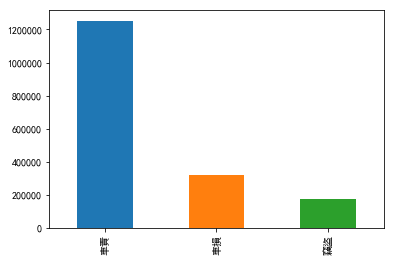

In [51]:
df_policy['Main_Insurance_Coverage_Group'].value_counts().plot(kind='bar')
df_policy['Main_Insurance_Coverage_Group'].value_counts()

# Insurance_Coverage 險種代碼

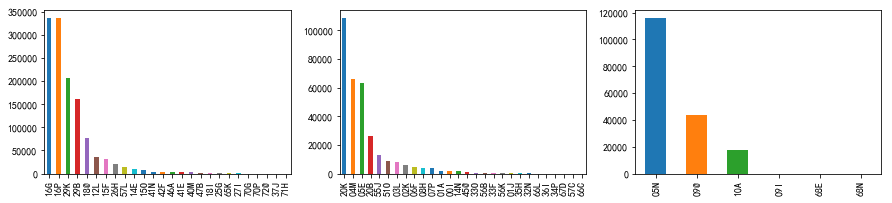

In [68]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
df_policy[df_policy['Main_Insurance_Coverage_Group'] == '車責']['Insurance_Coverage'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
df_policy[df_policy['Main_Insurance_Coverage_Group'] == '車損']['Insurance_Coverage'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
df_policy[df_policy['Main_Insurance_Coverage_Group'] == '竊盜']['Insurance_Coverage'].value_counts().plot(kind='bar')

# Insured_Amount1 Insured_Amount2 Insured_Amount3 保額ㄧ 二 三

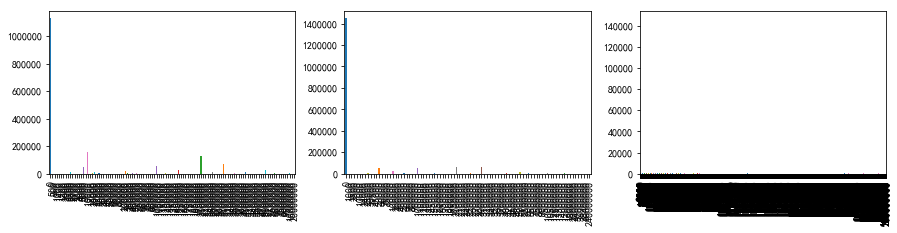

In [75]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
df_policy['Insured_Amount1'].value_counts().sort_index().plot(kind='bar')
plt.subplot(1,3,2)
df_policy['Insured_Amount2'].value_counts().sort_index().plot(kind='bar')
plt.subplot(1,3,3)
df_policy['Insured_Amount3'].value_counts().sort_index().plot(kind='bar')

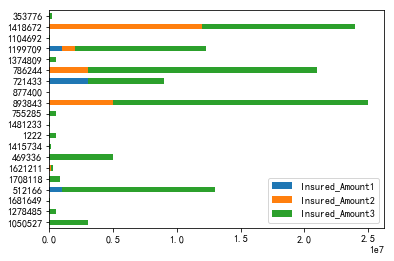

In [106]:
df_policy[['Insured_Amount1', 'Insured_Amount2', 'Insured_Amount3']].sample(20).plot.barh(stacked=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1319ec588>,
      dtype=object)

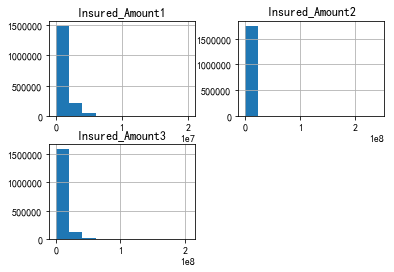

In [101]:
df_policy[['Insured_Amount1', 'Insured_Amount2', 'Insured_Amount3']].hist(bins=10)

In [81]:
df_policy['Insured_Amount1'].describe(), df_policy['Insured_Amount2'].describe(), df_policy['Insured_Amount3'].describe()

(count    1.747942e+06
 mean     4.986729e+05
 std      1.186382e+06
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      1.000000e+04
 max      2.000000e+07
 Name: Insured_Amount1, dtype: float64, count    1.747942e+06
 mean     3.508711e+05
 std      1.288439e+06
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      0.000000e+00
 max      2.400000e+08
 Name: Insured_Amount2, dtype: float64, count    1.747942e+06
 mean     5.308998e+06
 std      1.083447e+07
 min      0.000000e+00
 25%      2.000000e+05
 50%      6.110000e+05
 75%      4.000000e+06
 max      2.050000e+08
 Name: Insured_Amount3, dtype: float64)

## Coverage_Deductible_if_applied (自負額) 類別參照:險種分類及自負額說明Sheet

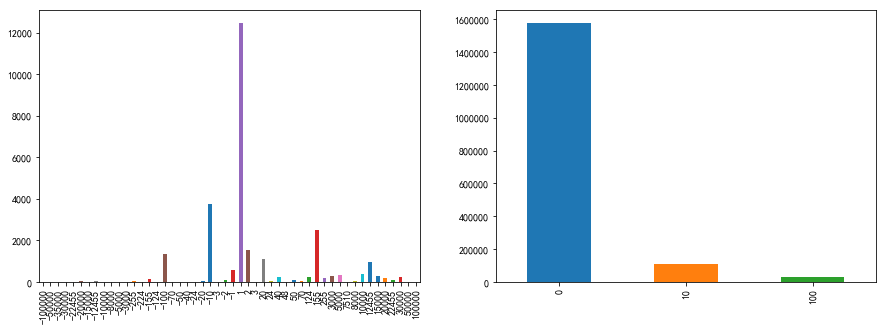

In [134]:
# Coverage_Deductible_if_applied(自負額) value counts

# 0   : 90.25%
# 10  : 6.4%
# 100 : 1.77%
# ...
# ==
# -100000          2
# -50000           2
# -35000           1
# -30000           5
# -22455          19
# -20000          22
# -15000           6
# -12455          30
# -10000          14
# -8000            3
# -5000           12
# -3000            9
# -255            26
# -224             1
# -155           136
# -124             7
# -100          1321
# -70              4
# -50              4
# -40             18
# -24              1
# -20             45
# -10           3760
# -3               1
# -2              98
# -1             596
#  0         1577591  90.25%
#  1           12463
#  2            1554
#  3              13
#  10         112069
#  20           1115
#  24             25
#  40            233
#  48              9
#  50             81
#  70             67
#  100         30873
#  124           232
#  155          2487
#  255           192
#  3000          276
#  5000          318
#  7510            7
#  8000           54
#  10000         384
#  12455         939
#  15000         304
#  20000         204
#  22455          78
#  30000         216
#  50000          12
#  100000          3
Coverage_Deductible_if_applied_value_counts = df_policy['Coverage_Deductible_if_applied'].value_counts().sort_index()
# plt.bar(np.arange(len(Coverage_Deductible_if_applied_value_counts)), Coverage_Deductible_if_applied_value_counts.values)
# Coverage_Deductible_if_applied_value_counts.plot.bar()

# df_policy['Coverage_Deductible_if_applied'].value_counts().sort_index().plot.bar()
plt.figure(figsize=(15,5))
plt.subplot(121)
Coverage_Deductible_if_applied_value_counts[Coverage_Deductible_if_applied_value_counts < 30000].plot.bar()
plt.subplot(122)
Coverage_Deductible_if_applied_value_counts[Coverage_Deductible_if_applied_value_counts > 30000].plot.bar()

# Premium 簽單保費

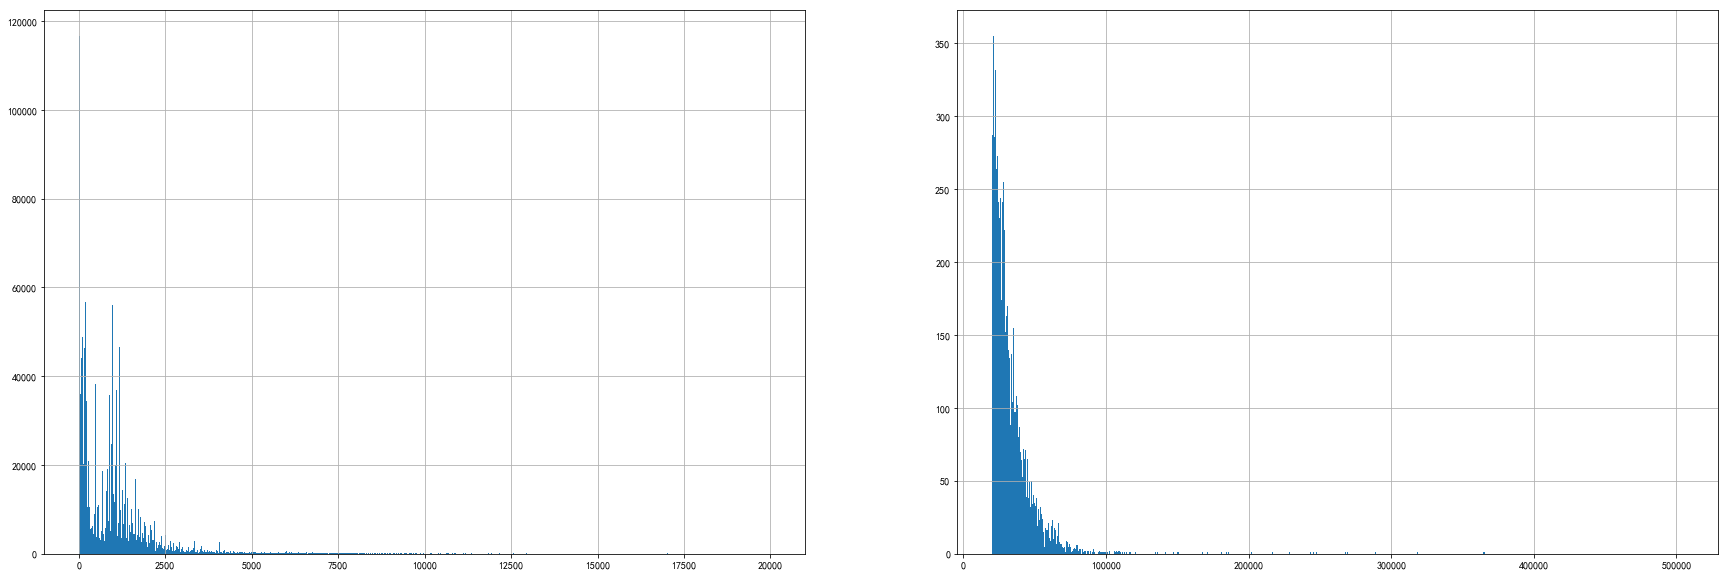

In [209]:
df_premium = df_policy['Premium']
plt.figure(figsize=(30,10))
plt.subplot(121)
df_premium[df_premium < 20000].hist(bins=1000)
plt.subplot(122)
df_premium[df_premium > 20000].hist(bins=1000)

In [211]:
df_premium.describe()

count    1.747942e+06
mean     1.326461e+03
std      3.240886e+03
min      0.000000e+00
25%      2.020000e+02
50%      8.370000e+02
75%      1.339000e+03
max      5.049320e+05
Name: Premium, dtype: float64

# Replacement_cost_of_insured_vehicle 重置成本

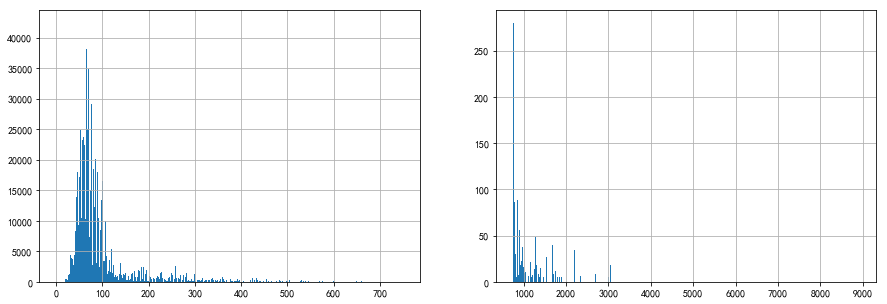

In [221]:
plt.figure(figsize=(15,5))
plt.subplot(121)
df_policy[df_policy.Replacement_cost_of_insured_vehicle < 750].Replacement_cost_of_insured_vehicle.hist(bins=1000)
plt.subplot(122)
df_policy[df_policy.Replacement_cost_of_insured_vehicle >= 750].Replacement_cost_of_insured_vehicle.hist(bins=1000)

In [ ]:
df_policy.Replacement_cost_of_insured_vehicle.describe()

# Distribution_Channel 主通路代號

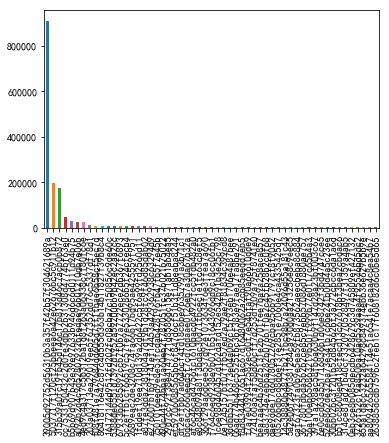

In [254]:
df_Distribution_Channel = df_policy.Distribution_Channel.value_counts()
df_Distribution_Channel[df_Distribution_Channel > 2000].plot.bar()

In [256]:
df_Distribution_Channel[df_Distribution_Channel < 2000]

5a9e93ba405dc8453667fd12d9afb8e8944da4c8    1990
03d6247c1ee2b2e969f766689ca576ea6ac15a20    1914
f24afd68aef6f9a4d5a8ec65d5c486b46e941f7f    1841
d6d31a3a6659aecf85f956068e042a84529964af    1837
1d5eb7712897f0df61b940314a34ea576dceb544    1805
c754774691c4f010ac5b8b89791c309b48b235b6    1804
0090902477ffe105c4b342a37987a0b82103e7b0    1793
39039990e9682126bb2e9509c2843d18d0bbcaa7    1789
8d5f9664fc9ba1e8e480433d631752e5e140dcdf    1784
ab55681713724760401bed36244b481eb97e45c7    1735
c57737e7c2d2f88f5872725b09cd98b81bb3a150    1702
85ff1caa2314b41b4861a70cf82d43bc98457d4f    1686
08c28f51a86e9185d9f66c1bebb614f4e68e2ee2    1682
301a630d6ad24532da2b09d66c53b408aea8973b    1681
de6dd8bbf374c7f78e5a9407ec423a52b514101c    1668
fb74fcdc59b82cd4bf7c95480f7c23b6ead37749    1659
6be49b49a0739c7d508c57a1ca73a398c0776cf8    1600
fd49779635ff808a061f8840c67430f52591c73b    1536
4e83ee968d0186ef20e46a372d031c28bcac8444    1522
ab2b3650714aba699869f1df2bf30cd7c170d9a8    1443
4fc6a01a1da83c8dee43

# Multiple_Products_with_TmNewa_(Yes_or_No?) 同一車主前一年度非車險保單件數

count    1.747942e+06
mean     5.213179e+00
std      1.052716e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.083000e+03
Name: Multiple_Products_with_TmNewa_(Yes_or_No?), dtype: float64

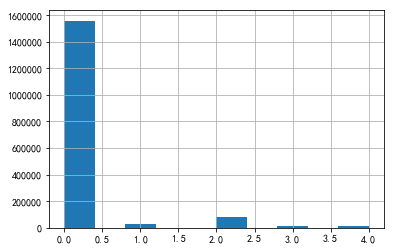

In [288]:
df_Multiple_Products_with_TmNewa = df_policy['Multiple_Products_with_TmNewa_(Yes_or_No?)']
df_Multiple_Products_with_TmNewa[(df_Multiple_Products_with_TmNewa >= 0) & (df_Multiple_Products_with_TmNewa < 5)].hist(bins=10)
df_Multiple_Products_with_TmNewa.describe()

In [289]:
# proportions: (0, 0~5, 5~) = 0.89: 0.08: 0.02
df_Multiple_Products_with_TmNewa[df_Multiple_Products_with_TmNewa == 0].count() / df_Multiple_Products_with_TmNewa.count() # 0.89
df_Multiple_Products_with_TmNewa[(df_Multiple_Products_with_TmNewa > 0) & (df_Multiple_Products_with_TmNewa < 5)].count() / df_Multiple_Products_with_TmNewa.count() # 0.08
df_Multiple_Products_with_TmNewa[df_Multiple_Products_with_TmNewa >= 5].count() / df_Multiple_Products_with_TmNewa.count() # 0.02

0.028368790268784663

## Insurance_Coverage 險種代碼

In [138]:
# 險種代碼對應自負額
for c in sorted(set(df_policy['Insurance_Coverage'])):
    print(c," ", set(df_policy[df_policy['Insurance_Coverage'] == c]['Coverage_Deductible_if_applied']) )

00I   {0, 1, 2, 8000, 20000, -8000, 3, 10000, 30000, 15000, -3, -1}
01A   {0}
01J   {0}
02K   {0, 1, 2, 3, 10000, 15000, 20000, 100000, 30000, -50000, 8000, -8000, -35000, 50000, -30000, -20000, -100000, -15000, -10000, -1, -2}
03L   {0}
04M   {0, -20000, 20000, 8000, 5000, -3000, 30000, 50000, 10000, -30000, -50000, 3000, 15000, -5000}
05E   {0}
05N   {0, 10, -20, 20, -10}
06F   {0}
07P   {0}
08H   {0}
09@   {0}
09I   {7510}
10A   {0, 10, 100, -10}
12L   {0}
14E   {0, 1, 100, 10, 20, -10, 155, 124}
14N   {0, 10, 20, -10}
15F   {0, 100, 70, 40, -50, 50, -40, -70, -100}
15O   {-224, 1, 2, -255, -124, -155, 12455, -22455, -2, 22455, -12455, 155, 124, -1, 255}
16G   {0, 10000, 5000}
16P   {0, 10000, -5000, 5000}
18@   {0}
18I   {0}
20B   {0}
20K   {0}
25G   {0}
26H   {0}
27I   {0}
29B   {0}
29K   {0, 1, 10}
32N   {0, 24, 48}
33F   {0, 24, 48}
33O   {0, 24, 48, -24}
34P   {0}
35H   {0}
36I   {0}
37J   {10000, 30000}
40M   {0}
41E   {0}
41N   {0}
42F   {0}
45@   {0}
46A   {0}
47B   {0}
51O 

## Main_Insurance_Coverage_Group 險種分類

In [ ]:
# 車責    1253120
# 車損     318013
# 竊盜     176809
Main_Insurance_Coverage_Group_value_counts = df_policy['Main_Insurance_Coverage_Group'].value_counts()
plt.bar(['車責', '車損', '竊盜'], df_policy['Main_Insurance_Coverage_Group'].value_counts().sort_values())
df1 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車責']
df2 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='竊盜']
df3 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車損']
## 'lia_class'車責本期級數   分級1-19 新戶從4開始 出險（+3) 沒有出險 (-1)  
## -1(55%) 0(7.6%) 要怎麼解釋？  

# ----->
# 解1: -1 0 都當作 1 解2: 當成調整項 +10% x lia_class

col = 'lia_class'
print('車責',df1[col].shape) #車責 (1253120,)
print('竊盜',df2[col].shape) #竊盜 (176809,)
print('車損',df3[col].shape) #車損 (318013,)
# 車責本期級數
print('車責', sorted(set(df1[col])))
print('竊盜', sorted(set(df2[col])))
print('車損', sorted(set(df3[col])))

'\n(%)\n-1  54.632198033707866 \n0   7.66486848825332 \n1   9.491189989785495 \n2   8.888294816138917\n3   7.6516215526046985\n4   8.230975485188969\n5   1.2548678498467825\n6   0.8911357252298264\n7   0.6505362614913177\n8   0.2353326098059244\n9   0.16678370786516852\n10  0.09847420837589378\n11  0.04365104698672114\n12  0.0400600102145046\n13  0.022902834525025534\n14  0.010852911133810011\n15  0.009576098059244127\n16  0.007581077630234934\n17  0.001995020429009193\n18  0.0040698416751787534\n19  0.0030324310520939736\n'

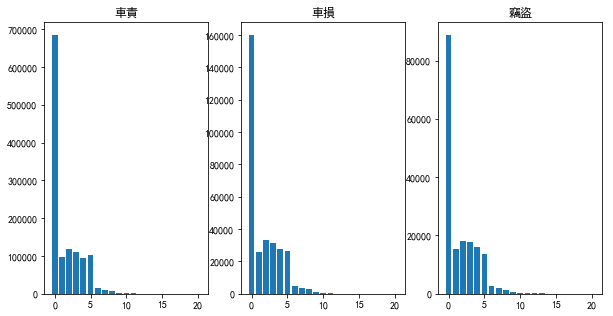

In [172]:
# 車責本期級數 in 險種分類
lia_classes = ['車責', '車損', '竊盜']
plt.figure(figsize=(10,5))
for index, lia_class in enumerate(lia_classes):
    lia_class_value_count = df_policy.loc[df_policy['Main_Insurance_Coverage_Group'] == lia_class, 'lia_class'].value_counts().sort_index()
    plt.subplot(1,3,index+1)
    plt.title(lia_class)
    plt.bar(np.arange(len(lia_class_value_count)), lia_class_value_count)
    
#     for x in sorted(set(df1[col])):
#         print(x, df1[df1['lia_class']== x].shape[0]/df1.shape[0]*100)  
'''
(%)
-1  54.632198033707866 
0   7.66486848825332 
1   9.491189989785495 
2   8.888294816138917
3   7.6516215526046985
4   8.230975485188969
5   1.2548678498467825
6   0.8911357252298264
7   0.6505362614913177
8   0.2353326098059244
9   0.16678370786516852
10  0.09847420837589378
11  0.04365104698672114
12  0.0400600102145046
13  0.022902834525025534
14  0.010852911133810011
15  0.009576098059244127
16  0.007581077630234934
17  0.001995020429009193
18  0.0040698416751787534
19  0.0030324310520939736
'''

## pdmg_acc 車體賠款係數

In [176]:
col = 'pdmg_acc'
# print('車責', sorted(set(df1[col])))
# print('竊盜', sorted(set(df2[col])))
# print('車損', sorted(set(df3[col])))
# 車責 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0]
# 竊盜 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 2.0, 4.0]
# 車損 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0]
# 竊盜 無 1.6

## lia_class 車責本期級數

<Container object of 21 artists>

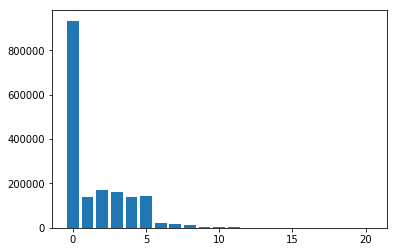

In [143]:
lia_class_value_count = df_policy['lia_class'].value_counts().sort_index()
plt.bar(np.arange(len(lia_class_value_count)), lia_class_value_count)

In [177]:
## Summary: 
# '''
# 'Insured_Amount1'                             : all postive - >negative
# 'Insured_Amount2'                             : all postive - >negative
# 'Insured_Amount3'                             : all postive - >negative
# 'Coverage_Deductible_if_applied'              : -100000 ~ 10000 -> take abs(Positive)
# 'Premium'                                     : all postive - > remain
# 'Replacement_cost_of_insured_vehicle'         : 1 ~ 8915  -> negative
# 'lia_class'                                   : set {-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
#                                                 11, 12, 13, 14, 15, 16, 17, 18, 19} >10 only 0.16%
#                                                 convert to 1+ (x * 10%)

# 'plia_acc'                                   : set [-0.38, -0.35, -0.3, -0.2, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 
#                                                     1.2, 1.5, 1.8, 2.1, 2.4, 2.8, 3.2, 3.7, 4.2, 4.7]
#                                                convert to (1+x)%
                                               
# 'pdmg_acc'                                   : set {-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0}
#                                                  convert to (1+x)%                                            
                                                
# '''

## ibirth 出生日期,  dbirth 要保人出生日期

In [193]:
# null count
# ibirth                              317765
# dbirth                            258932
driver = df_policy[['ibirth' , 'dbirth']]
condition1 = driver['ibirth'].isnull()    # 18.2 %
condition2 = driver['dbirth'].isnull()    # 14.8 %

condition3 = driver['ibirth'].notnull()   
condition4 = driver['dbirth'].notnull()   


driver_0N= driver[condition3&condition4]  # both have values  (81.5%)
driver_1N= driver[condition1^condition2]  # missing one (3.9%)
driver_2N= driver[condition1|condition2]  # missing both (18.4%)

# print(driver_0N.shape[0]/driver.shape[0])
# print(driver_1N.shape[0]/driver.shape[0]) 
# print(driver_2N.shape[0]/driver.shape[0])

0.8152427254451234
0.039585409584528546
0.18475727455487653


In [206]:
# ibirth != dbirth
indiff = driver_0N[driver_0N['ibirth'] != driver_0N['dbirth']]
print(indiff.count()) #75794

ibirth    75794
dbirth    75794
dtype: int64


In [1]:
# weired dates
# 可參考 Accident_Date：出險日期
# https://tbrain.trendmicro.com.tw/Discussion/Forum/4
### dbirth has some weird date
### check non-null data & sort

# print(driver['dbirth'].notnull().sum()) # 1489010

# a = df_policy[driver['dbirth'].notnull()]['dbirth']
# b = sorted(a, key=lambda x: datetime.datetime.strptime(x, '%m/%Y'), reverse = True)
# driver_0N.loc[:,'ibirth_date'] = driver_0N.loc[:,'ibirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y'))
# driver_0N.loc[:,'dbirth_date'] = driver_0N.loc[:,'dbirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y'))

In [247]:
# len(driver_0N.loc[driver_0N['ibirth_date'] > datetime.datetime.now()]) # 0
# len(driver_0N.loc[driver_0N['dbirth_date'] > datetime.datetime.now()]) # 60

0

In [241]:
driver_0N['dbirth_date'].max(), driver_0N['dbirth_date'].min()  # max: 2658/9/1, min: 1912/2/1

(datetime.datetime(2658, 9, 1, 0, 0), datetime.datetime(1912, 2, 1, 0, 0))

## fassured 被保險人性質
1:國內自然人     1427579
2:國內法人        317771
3:國外自然人     2586
4:國外法人
5:自然人ID有誤 
6:法人ID有誤       6

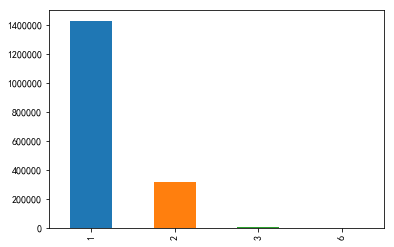

In [43]:
df_policy['fassured'].value_counts().plot(kind='bar')

# Claim File

(69613, 20)

Claim_Number	賠案號碼

Nature_of_the_claim	賠案性質

Policy_Number	保單號碼

Driver's_Gender	肇事駕駛性別

Driver's_Relationship_with_Insured	與被保險人關係

DOB_of_Driver	肇事駕駛出生日

Marital_Status_of_Driver	肇事駕駛婚姻

Accident_Date	出險日期

Cause_of_Loss	出險原因

Paid_Loss_Amount	已決賠款

paid_Expenses_Amount	已決費用

Salvage_or_Subrogation?	追償金額

Coverage	險種代號

Vehicle_identifier	車牌

At_Fault?	肇責比例

Claim_Status_(close,_open,_reopen_etc)	單一險種CLOSE

Deductible	自負額

Accident_area	出險地區

number_of_claimants	事故關係人人數

Accident_Time	出險時間

# check Claim NAN

In [49]:
df_claim.isnull().sum()
# Vehicle_identifier: 298
# At_Fault?: 39

## Nature_of_the_claim 賠案性質

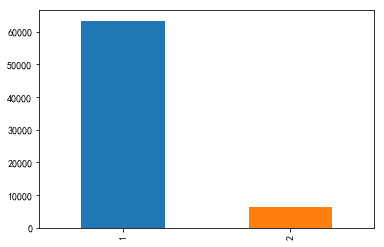

In [52]:
# 1: 賠償 63389
# 2: 追償 6224
df_claim['Nature_of_the_claim'].value_counts().plot(kind='bar')

## Driver's_Gender 肇事駕駛性別

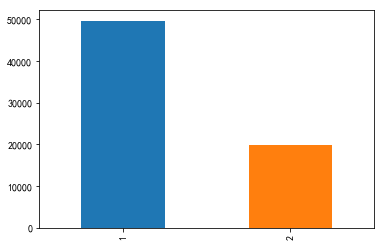

In [55]:
# 1: 男 49698
# 2: 女 19915
df_claim['Driver\'s_Gender'].value_counts().plot(kind='bar')

# Driver's_Relationship_with_Insured 與被保險人關係
1:被保險人本人  30134
2:被保險人親友 15074
3:被保險人員工  8231
4:租用被保險車輛  78
5:其他,  10130
6:配偶, 4654
7:子女 1312

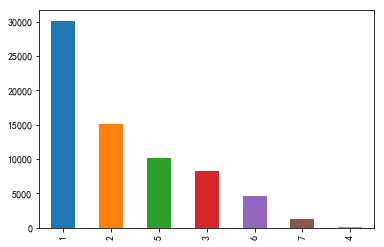

In [66]:
df_claim['Driver\'s_Relationship_with_Insured'].value_counts().plot(kind='bar')

# DOB_of_Driver 肇事駕駛生日

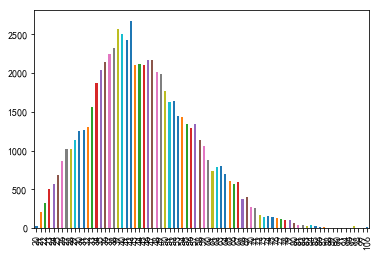

In [11]:
# 年紀分佈
(2018 - df_claim['DOB_of_Driver'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y')).dt.year).value_counts().sort_index().plot(kind='bar')

# Marital_Status_of_Driver 肇事駕駛婚姻
1: 已婚 52481
2: 未婚 17132

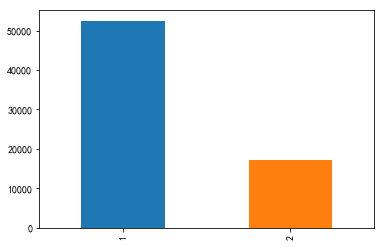

In [14]:
df_claim['Marital_Status_of_Driver'].value_counts().plot(kind='bar')

##  Accident_Date 出險日期

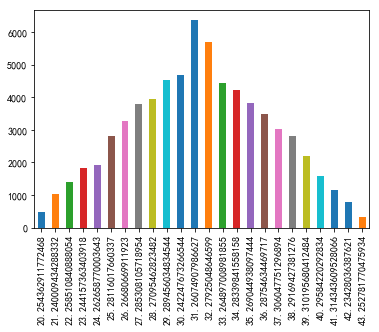

In [24]:
# 出險日期分佈 近<->遠
((datetime.datetime.now() - df_claim['Accident_Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m'))) / np.timedelta64(1, 'M')).value_counts().sort_index().plot(kind='bar')

## Cause_of_Loss 出險原因
17 kinds

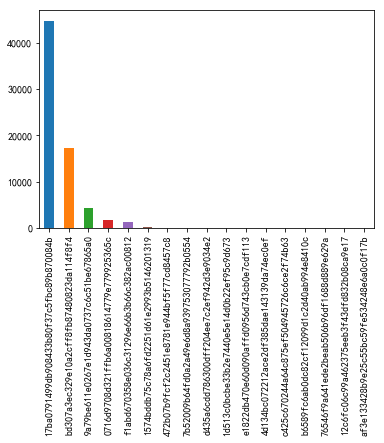

In [27]:
df_claim['Cause_of_Loss'].value_counts().plot(kind='bar')

# Paid_Loss_Amount 已決賠款

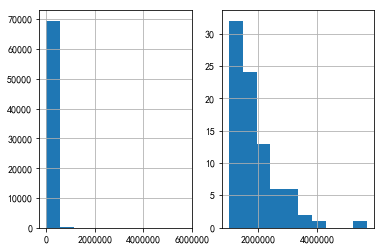

In [94]:
plt.subplot(1,2,1)
df_claim['Paid_Loss_Amount'].hist()
plt.subplot(1,2,2)
df_claim[df_claim['Paid_Loss_Amount'] >= 1000000]['Paid_Loss_Amount'].hist()

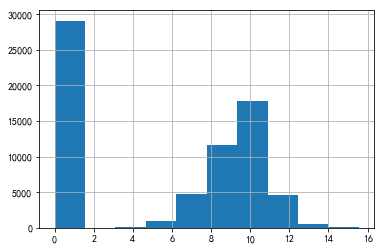

In [95]:
# log(x+1)
np.log(df_claim['Paid_Loss_Amount'] + 1).hist()

# paid_Expenses_Amount 已決費用

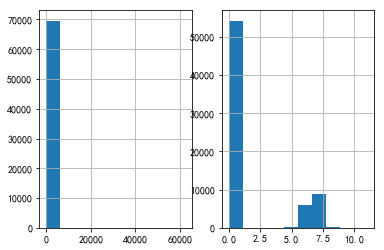

In [99]:
plt.subplot(121)
df_claim['paid_Expenses_Amount'].hist()
plt.subplot(122)
np.log(df_claim['paid_Expenses_Amount'] +1).hist() # log(x+1)

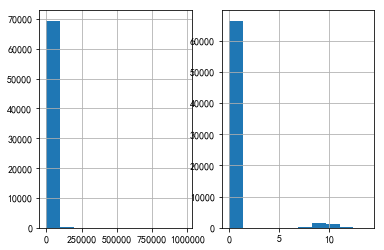

In [100]:
# Salvage_or_Subrogation? 追償金額
plt.subplot(121)
df_claim['Salvage_or_Subrogation?'].hist()
plt.subplot(122)
np.log(df_claim['Salvage_or_Subrogation?'] +1).hist() # log(x+1)

In [104]:
#已決賠款 已決費用 追償金額 
#關係？
df_claim[['Paid_Loss_Amount','paid_Expenses_Amount', 'Salvage_or_Subrogation?']].head()

,Paid_Loss_Amount,paid_Expenses_Amount,Salvage_or_Subrogation?
0,56705,0,0
1,30000,700,0
2,1100,0,0
3,151795,700,0
4,0,0,0


# Coverage 險種代號

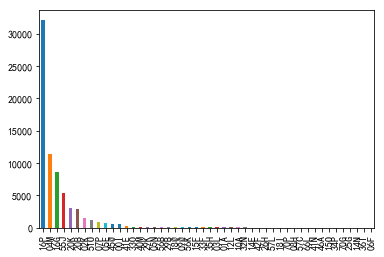

In [111]:
df_claim['Coverage'].value_counts().plot(kind='bar')

# Vehicle_identifier 車牌

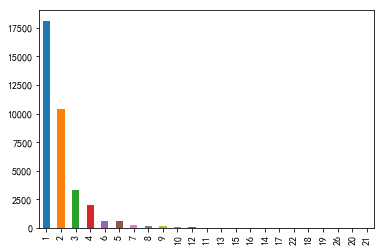

In [15]:
# 車牌事故數 次數分佈
df_claim['Vehicle_identifier'].value_counts().value_counts().plot(kind='bar')

# At_Fault? 肇責比例

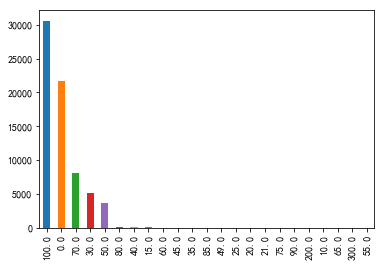

In [19]:
# 肇事比例分佈
df_claim['At_Fault?'].value_counts().plot(kind='bar')

# Claim_Status_(close,_open,_reopen_etc) 單一險種CLOSE
1.已經全部結案: 69604

0.尚未全部結案: 9

In [24]:
df_claim['Claim_Status_(close,_open,_reopen_etc)'].value_counts()

1    69604
0        9
Name: Claim_Status_(close,_open,_reopen_etc), dtype: int64

# Deductible 自負額
0: 69163筆

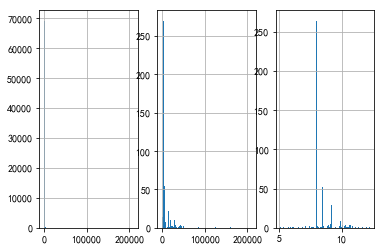

In [63]:
plt.subplot(1,3,1)
df_claim['Deductible'].hist(bins=100)
plt.subplot(1,3,2)
df_claim[df_claim['Deductible'] > 0]['Deductible'].hist(bins=100)
plt.subplot(1,3,3)
np.log(df_claim[df_claim['Deductible'] > 0]['Deductible']).hist(bins=100)

In [46]:
df_claim['Deductible'].describe()

count     69613.000000
mean         53.604197
std        1472.570564
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      209610.000000
Name: Deductible, dtype: float64

# Accident_area 出險地區

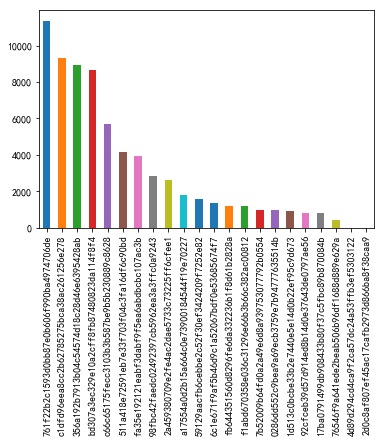

In [66]:
df_claim['Accident_area'].value_counts().plot(kind='bar')

# number_of_claimants 事故關係人人數

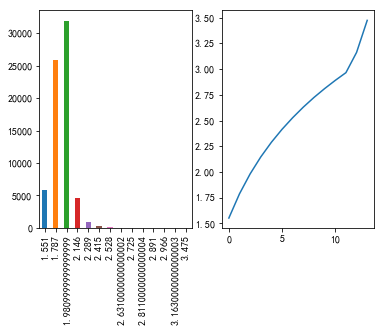

In [82]:
plt.subplot(121)
df_claim['number_of_claimants'].value_counts().sort_index().plot(kind='bar') # value distribution
plt.subplot(122)
plt.plot(df_claim['number_of_claimants'].value_counts().sort_index().index.values) # y: raw number of claimants

# Accident_Time 出險時間

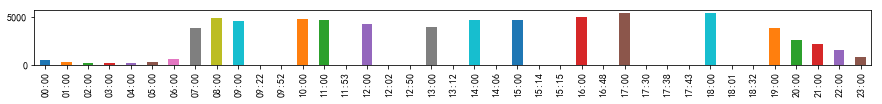

In [91]:
plt.figure(figsize=(15,1))
df_claim['Accident_Time'].value_counts().sort_index().plot(kind='bar')